

# Py Ladies: Finacial Inclusion In Africa 

The main dataset contains demographic information and what Finacial services as used by approximately 33,610
individuals across East Africa.This data was extracted from various Finscope surveys ranging from 2016 to 2018

The data have been split between training and test sets.The test set contains all information about each individual except 
for whether the repondent has a bank account or not

Your goal is to currectly predict the likehood that an individual has bank account or not i.e Yes = 1, No = 0


# Loading Dataset

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files


In [ ]:
uploaded =  files.upload()
uploaded

Saving Test_v2.csv to Test_v2.csv
Saving Train_v2.csv to Train_v2.csv


{'Test_v2.csv': b'country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type\nKenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government\nKenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private\nKenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent\nKenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent\nKenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent\nKenya,2018,uniqueid_6074,Rural,Yes,4,25,Female,Spouse,Married/Living together,Primary education,Self employed\nKenya,2018,uniqueid_6075,Rural,Yes,4,32,Female,Head of Ho

In [ ]:
test = pd.read_csv('Test_v2.csv')
#test.head()

In [ ]:
train = pd.read_csv('Train_v2.csv')
train.head()

country  year  ...                  education_level                   job_type
0   Kenya  2018  ...              Secondary education              Self employed
1   Kenya  2018  ...              No formal education       Government Dependent
2   Kenya  2018  ...  Vocational/Specialised training              Self employed
3   Kenya  2018  ...                Primary education  Formally employed Private
4   Kenya  2018  ...                Primary education        Informally employed

[5 rows x 13 columns]

In [ ]:
#submission_data = pd.read_csv('SubmissionFile.csv')
#submission_data.head()

In [ ]:
#variable_def = pd.read_csv('VariableDefinitions.csv')
#variable_def.head()

In [ ]:
combined_df = pd.concat([train,test])

# Understanding Data


In [ ]:
#Checking the Number of Rows and columns
train.shape

(23524, 13)

In [ ]:
test.shape

(10086, 12)

In [ ]:
combined_df.shape

(33610, 13)

In [ ]:
combined_df.iloc[len(train)-3:]

country  ...                      job_type
23521  Uganda  ...                  Other Income
23522  Uganda  ...                 Self employed
23523  Uganda  ...                     No Income
0       Kenya  ...  Formally employed Government
1       Kenya  ...     Formally employed Private
...       ...  ...                           ...
10081  Uganda  ...                 Self employed
10082  Uganda  ...                 Self employed
10083  Uganda  ...                  Other Income
10084  Uganda  ...                 Self employed
10085  Uganda  ...                  Other Income

[10089 rows x 13 columns]

In [ ]:
combined_df.columns

Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

In [ ]:
#checking the datatypes,null values 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [ ]:
combined_df.drop(columns=['bank_account']).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33610 entries, 0 to 10085
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 33610 non-null  object
 1   year                    33610 non-null  int64 
 2   uniqueid                33610 non-null  object
 3   location_type           33610 non-null  object
 4   cellphone_access        33610 non-null  object
 5   household_size          33610 non-null  int64 
 6   age_of_respondent       33610 non-null  int64 
 7   gender_of_respondent    33610 non-null  object
 8   relationship_with_head  33610 non-null  object
 9   marital_status          33610 non-null  object
 10  education_level         33610 non-null  object
 11  job_type                33610 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.3+ MB


In [ ]:
train.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [ ]:
combined_df.duplicated().any()

False

In [ ]:
combined_df.nunique()

country                       4
year                          3
uniqueid                  12480
bank_account                  2
location_type                 2
cellphone_access              2
household_size               20
age_of_respondent            85
gender_of_respondent          2
relationship_with_head        6
marital_status                5
education_level               6
job_type                     10
dtype: int64

In [ ]:
#test.isnull().sum()

In [ ]:
#test.duplicated().any()

# Data Prepational

it include cleaning the data,data analysis ,processing,Normalization 
# Our data is Clean so we can move  forward 

Data Analysis

In [ ]:
#train.describe(include = 'all')
train.describe()

year  household_size  age_of_respondent
count  23524.000000    23524.000000       23524.000000
mean    2016.975939        3.797483          38.805220
std        0.847371        2.227613          16.520569
min     2016.000000        1.000000          16.000000
25%     2016.000000        2.000000          26.000000
50%     2017.000000        3.000000          35.000000
75%     2018.000000        5.000000          49.000000
max     2018.000000       21.000000         100.000000

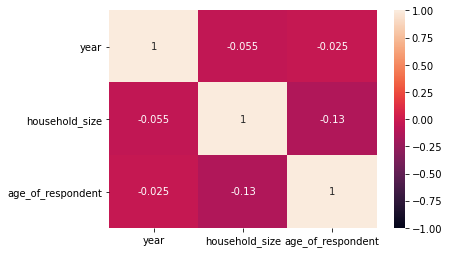

In [ ]:
import seaborn as sns

#Finding correlation ---close to 1 means a postive correlation and close to 0 is negative correlation and 0
#correlation means no correlation
sns.heatmap(combined_df.corr(),annot = True, vmax = 1 ,vmin=-1)

we can say that our variables have a negative correletion

Text(0.5, 1.0, 'General Statistics Of Loans Dataset')

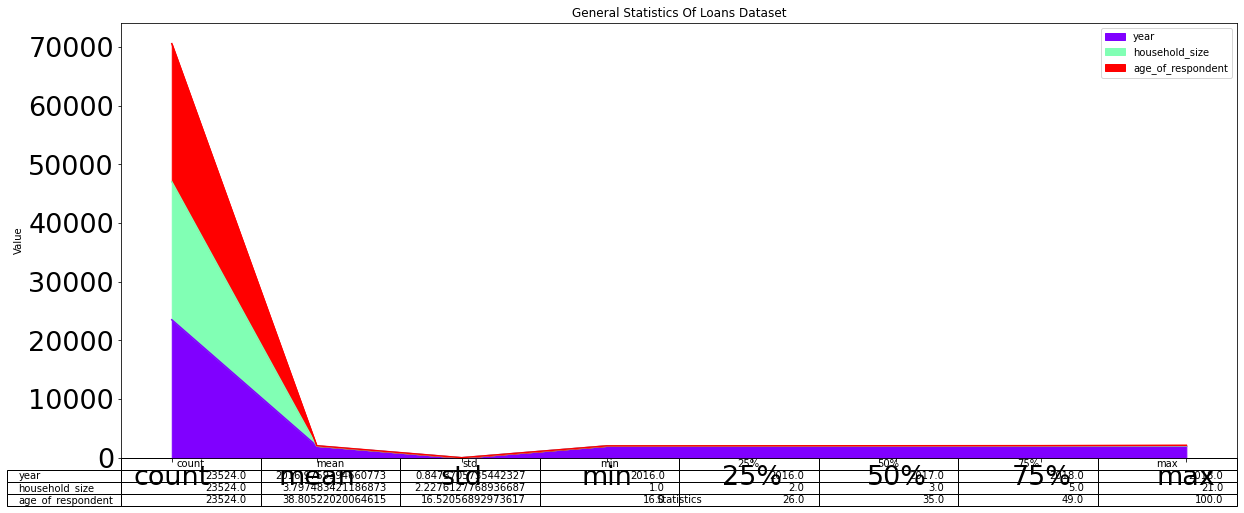

In [ ]:
import matplotlib.pyplot  as plt
train.describe().plot(kind='area',fontsize=27,figsize = (20,8),table = True ,colormap = 'rainbow')
plt.xlabel('Statistics')
plt.ylabel('Value')
plt.title('General Statistics Of Loans Dataset')

# Univariate Analysis

In [ ]:
combined_df.dtypes

country                   object
year                       int64
uniqueid                  object
bank_account              object
location_type             object
cellphone_access          object
household_size             int64
age_of_respondent          int64
gender_of_respondent      object
relationship_with_head    object
marital_status            object
education_level           object
job_type                  object
dtype: object

# change Datatypes


In [ ]:
# train.location_type = train.location_type.cat.codes
cat_df = combined_df.select_dtypes(include=['object']).apply(lambda x: x.astype('category').cat.codes)

cat_df.head()

country  uniqueid  bank_account  ...  marital_status  education_level  job_type
0        0         0             1  ...               2                3         9
1        0      3592             0  ...               4                0         4
2        0      4703             1  ...               3                5         9
3        0      5814             0  ...               2                2         3
4        0      6925             0  ...               3                2         5

[5 rows x 10 columns]

In [ ]:
num_df = combined_df.select_dtypes(include=['int'])

In [ ]:
combined_data = pd.concat([cat_df,num_df],axis=1)
combined_data

country  uniqueid  bank_account  ...  year  household_size  age_of_respondent
0            0         0             1  ...  2018               3                 24
1            0      3592             0  ...  2018               5                 70
2            0      4703             1  ...  2018               5                 26
3            0      5814             0  ...  2018               5                 34
4            0      6925             0  ...  2018               8                 26
...        ...       ...           ...  ...   ...             ...                ...
10081        3      4701            -1  ...  2018               2                 62
10082        3      4702            -1  ...  2018               8                 42
10083        3      4706            -1  ...  2018               1                 39
10084        3      4707            -1  ...  2018               6                 28
10085        3      4708            -1  ...  2018               7                 16

[33610 rows x 13 columns]

In [ ]:
combined_data.head()

country  uniqueid  bank_account  ...  year  household_size  age_of_respondent
0        0         0             1  ...  2018               3                 24
1        0      3592             0  ...  2018               5                 70
2        0      4703             1  ...  2018               5                 26
3        0      5814             0  ...  2018               5                 34
4        0      6925             0  ...  2018               8                 26

[5 rows x 13 columns]

In [ ]:
def plotter(df=combined_df,col_name='location_type'):
  plt.style.use('ggplot')
  plt.figure(figsize=(16,8))
  ax = sns.countplot(x=col_name, data=df)
  plt.title(f"Distribution of  {' '.join(col_name.split('_'))}")
  plt.xlabel(f"Number of  {' '.join(col_name.split('_'))}")
  plt.xticks(rotation=45)
  total = len(combined_data[col_name])
  for p in ax.patches:
      width = p.get_width()
      height = p.get_height()
      percentage = f'{100 * p.get_height()/total:.1f}%'
      x, y = p.get_xy() 
      ax.annotate(percentage, (x + width/2, y + height*1.02), ha='center')


  plt.show()

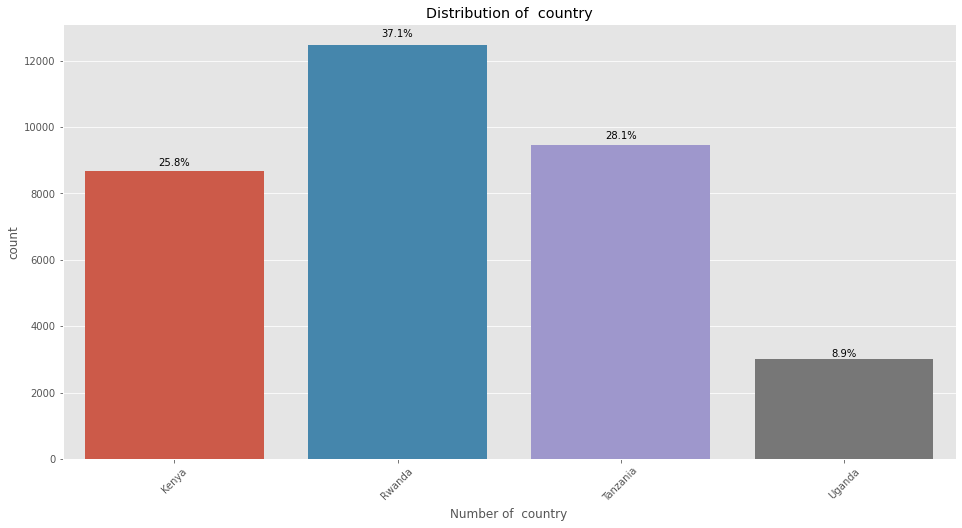

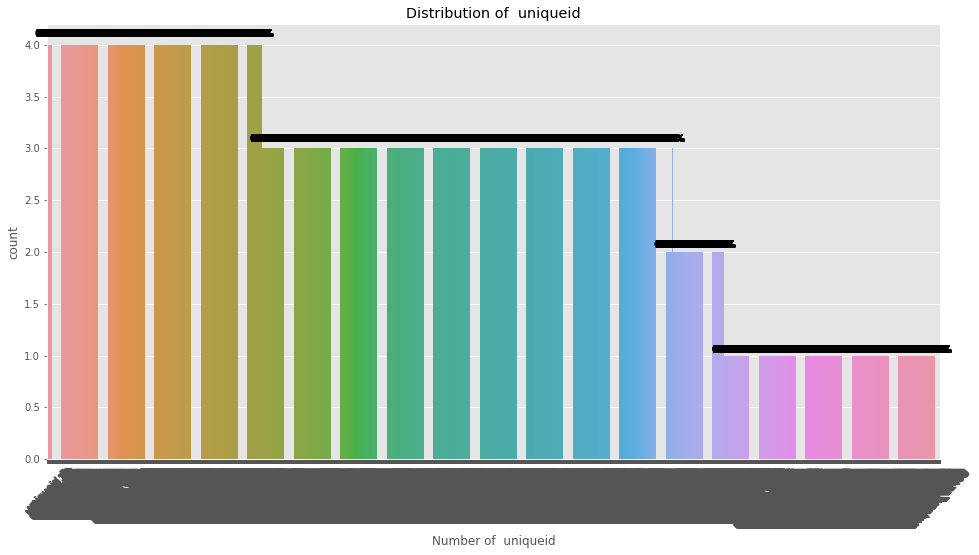

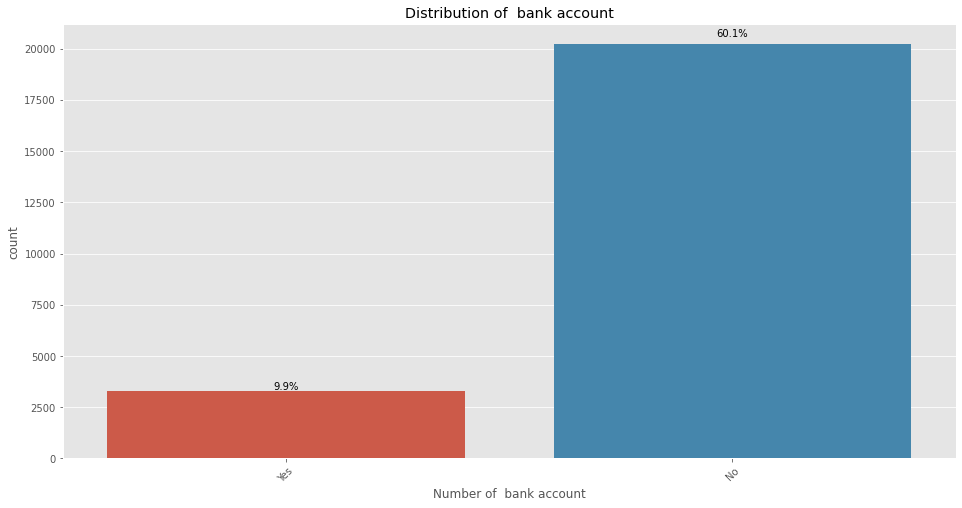

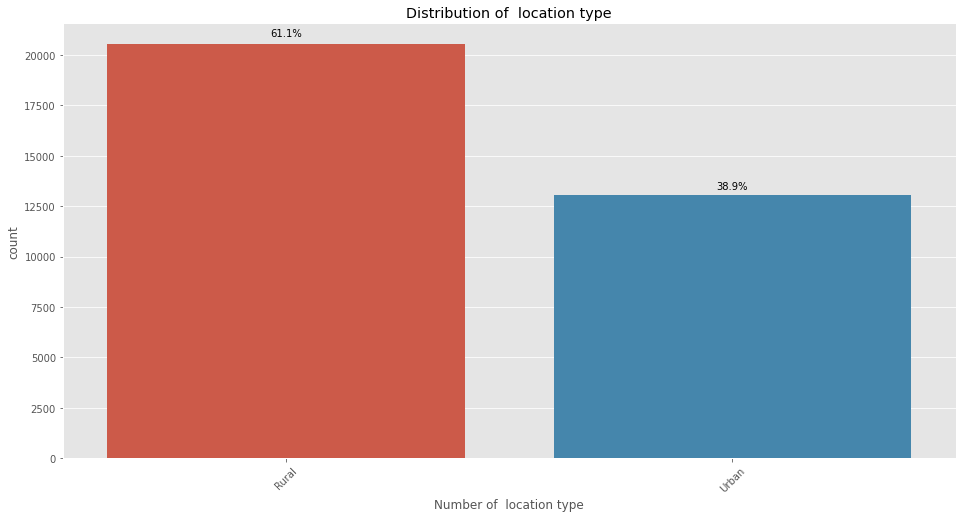

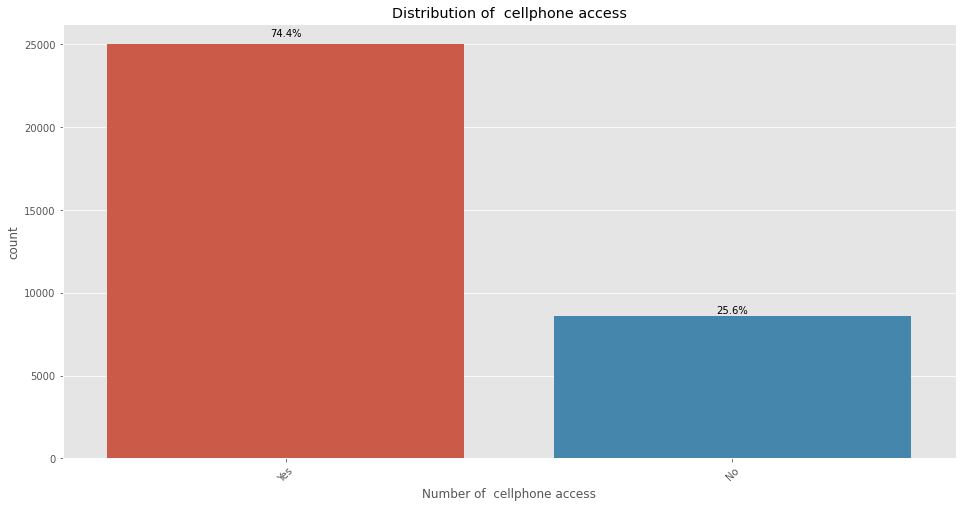

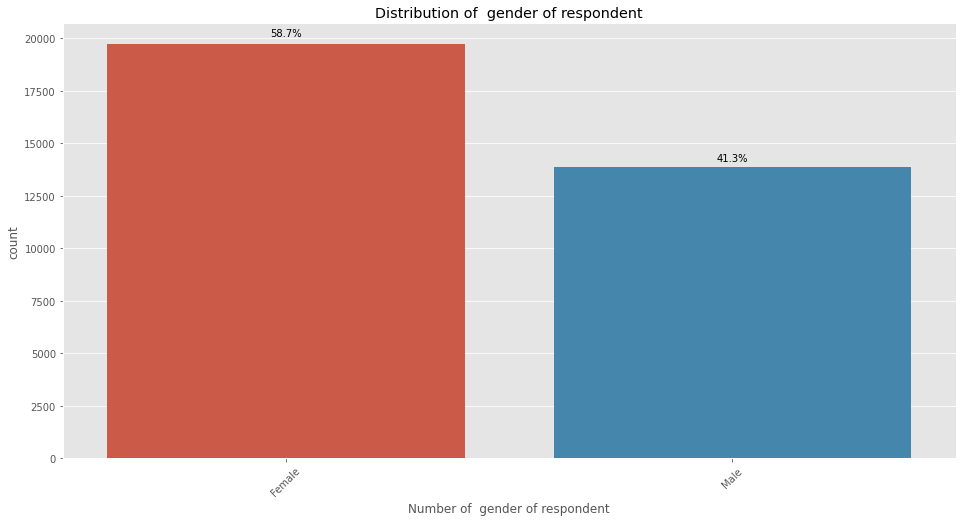

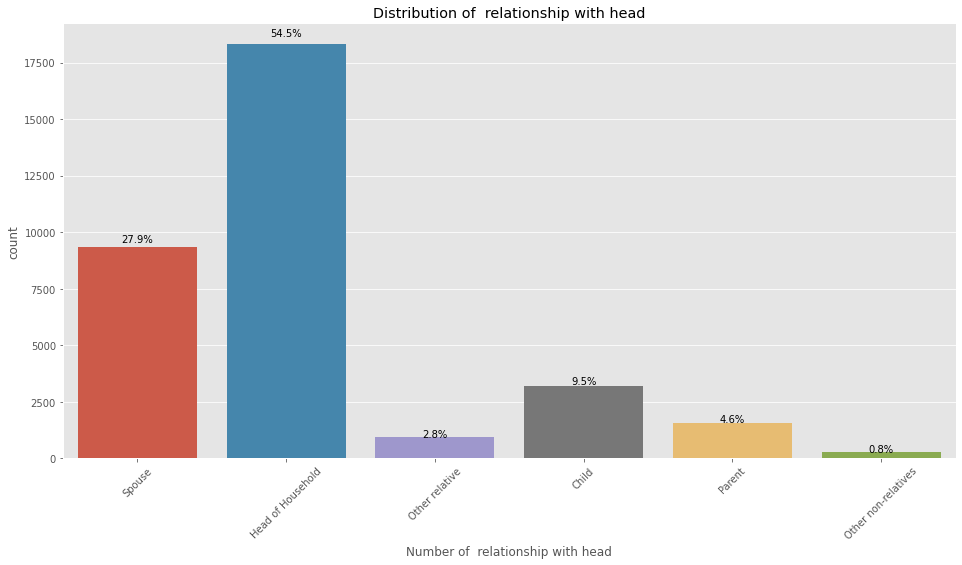

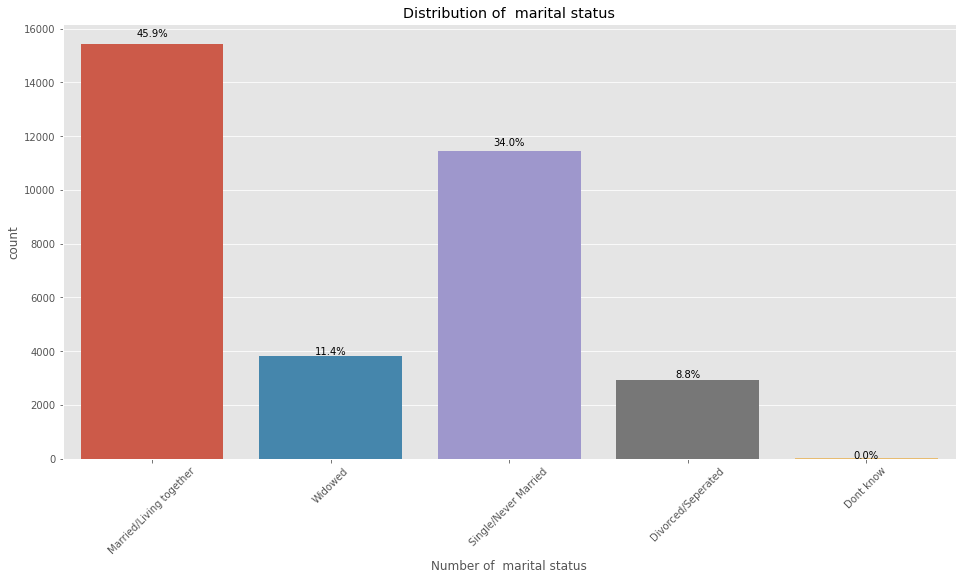

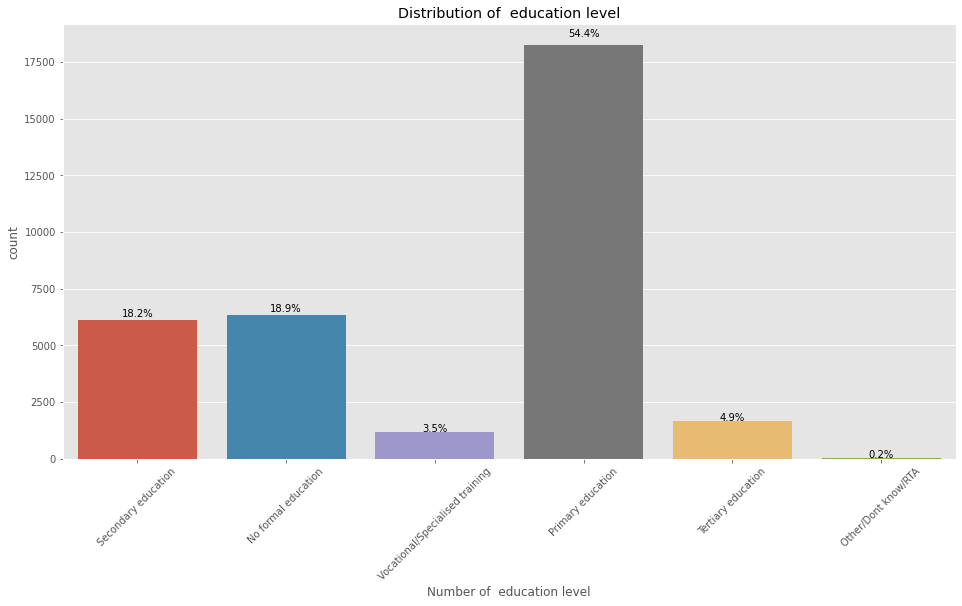

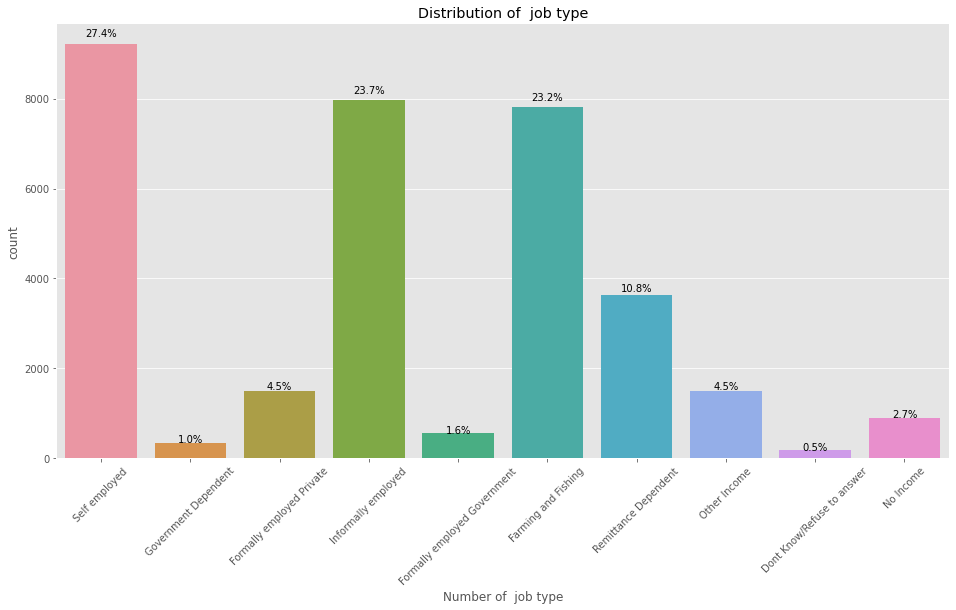

In [ ]:
for col in list(cat_df.columns):
  plotter(col_name=col)

No handles with labels found to put in legend.


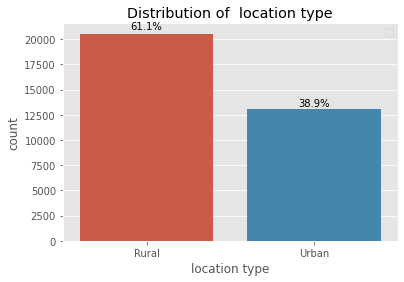

In [ ]:
ax = sns.countplot(x="location_type", data=combined_df)
plt.title('Distribution of  location type')
plt.xlabel('location type')
plt.legend()
total = len(combined_data['location_type'])
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    percentage = f'{100 * p.get_height()/total:.1f}%'
    x, y = p.get_xy() 
    ax.annotate(percentage, (x + width/2, y + height*1.02), ha='center')


In [ ]:
 #plotter('location_type')

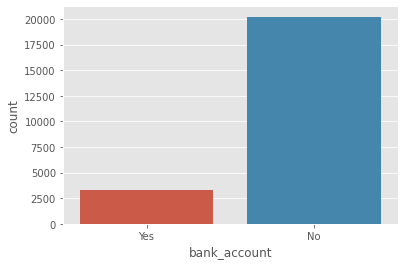

In [ ]:
sns.countplot(x='bank_account', data=train);

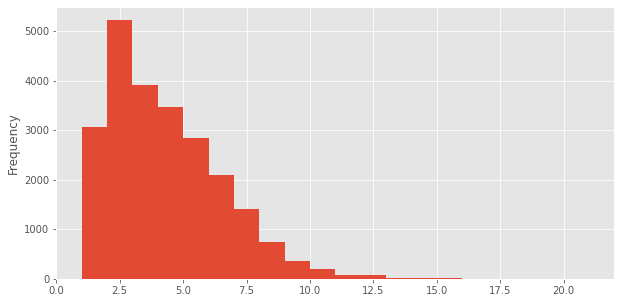

In [ ]:
train['household_size'].plot.hist(bins = 20 , figsize = (10 ,5))

# Bivariate Analysis

There are few numbers of people with a bank account

In [ ]:
help(plotter_multivariate)

Help on function plotter_multivariate in module __main__:

plotter_multivariate(df=      country  year  ...                  education_level                   job_type
0       Kenya  2018  ...              Secondary education              Self employed
1       Kenya  2018  ...              No formal education       Government Dependent
2       Kenya  2018  ...  Vocational/Specialised training              Self employed
3       Kenya  2018  ...                Primary education  Formally employed Private
4       Kenya  2018  ...                Primary education        Informally employed
...       ...   ...  ...                              ...                        ...
10081  Uganda  2018  ...                Primary education              Self employed
10082  Uganda  2018  ...                Primary education              Self employed
10083  Uganda  2018  ...              Secondary education               Other Income
10084  Uganda  2018  ...                Primary education          

In [ ]:
from tqdm.notebook import tqdm

for i in tqdm(range(1000)):
  print(i)

In [ ]:
def plotter_multivariate(df=combined_df,col_name='location_type'):
  '''
  This function helps plot the counts basing on the bank account variable.

  var df: The specific dataframe used
  var col_name: The variable being used for plotting.
  return object: The sns figure itself. 

  >>> example
  >>> df = 
  '''
  plt.style.use('ggplot')
  plt.figure(figsize=(16,8))
  ax = sns.countplot(x= col_name, hue = 'bank_account', data= train)
  # ax = sns.countplot(x=col_name, data=df)
  plt.title(f"Distribution of  {' '.join(col_name.split('_'))}")
  plt.xlabel(f"Number of  {' '.join(col_name.split('_'))}")
  plt.xticks(rotation=45)
  total = len(combined_data[col_name])
  for p in ax.patches:
      width = p.get_width()
      height = p.get_height()
      percentage = f'{100 * p.get_height()/total:.1f}%'
      x, y = p.get_xy() 
      ax.annotate(percentage, (x + width/2, y + height*1.02), ha='center')


  plt.show()

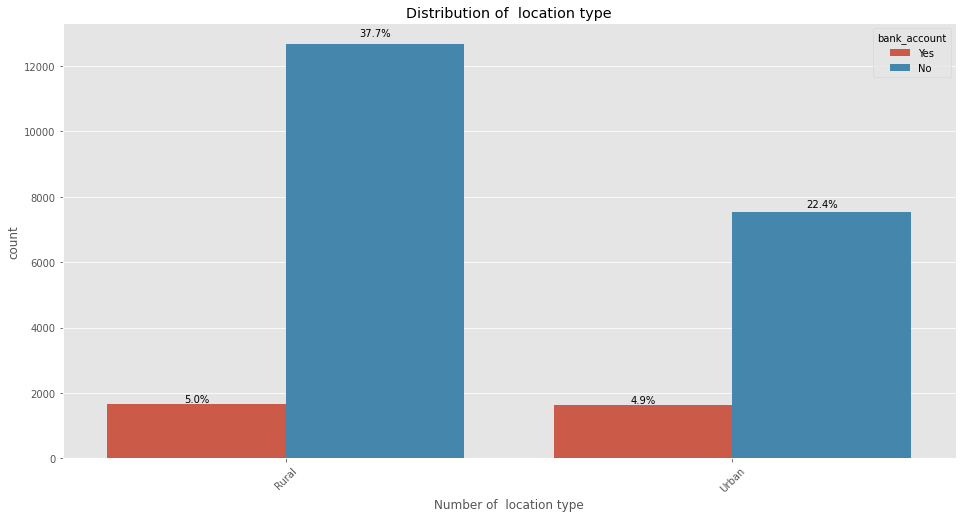

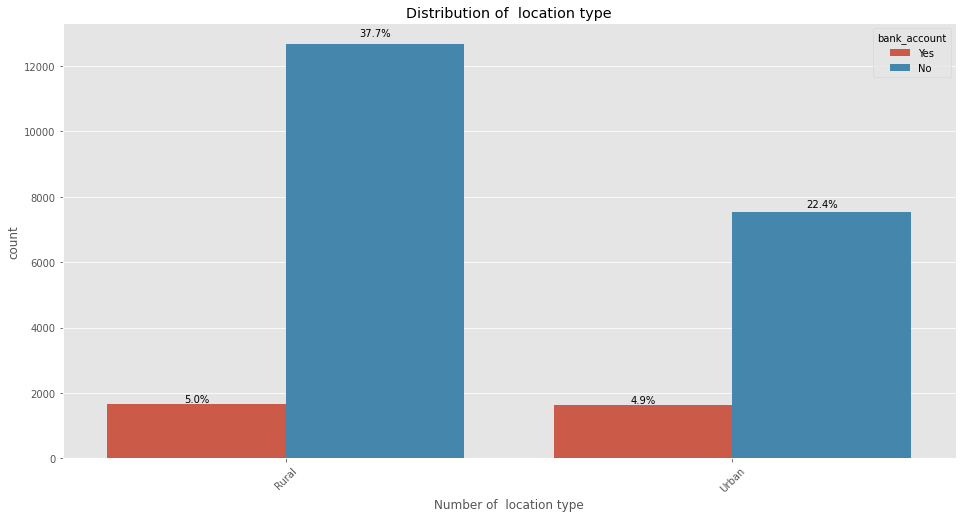

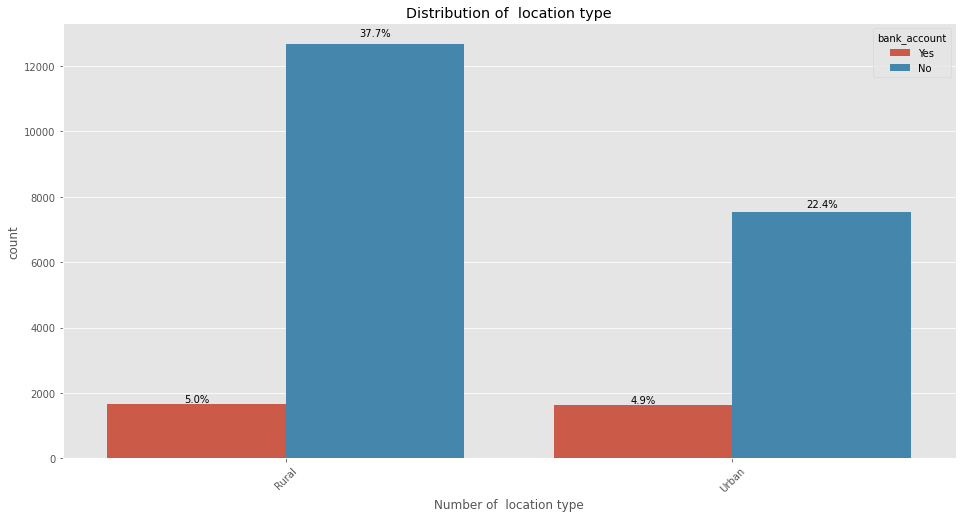

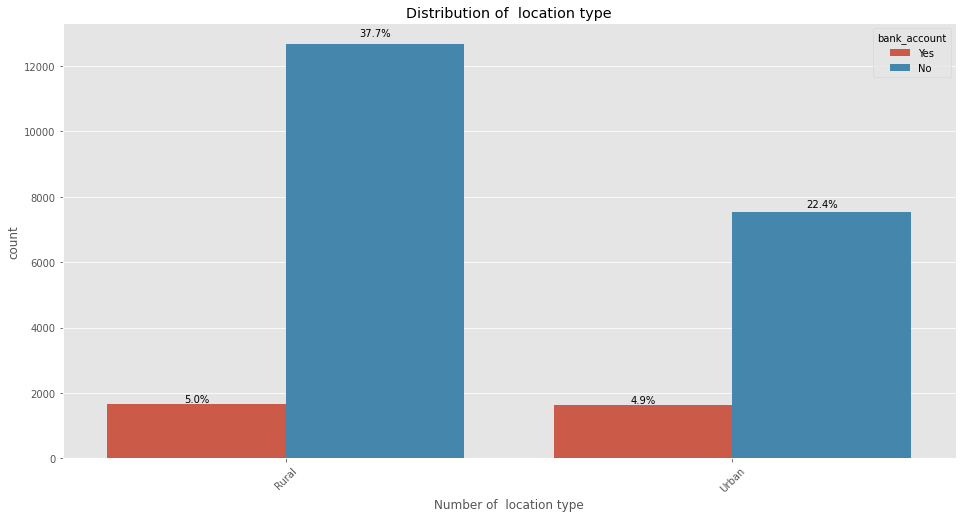

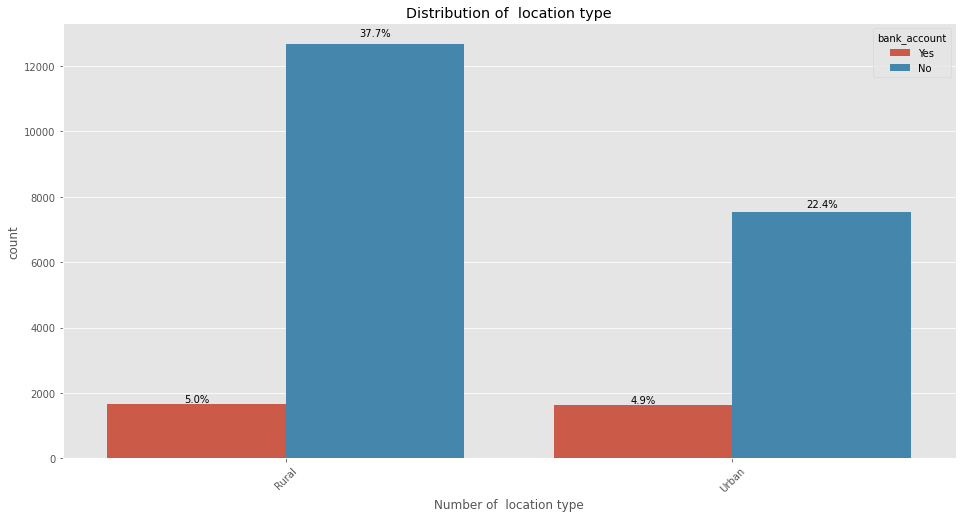

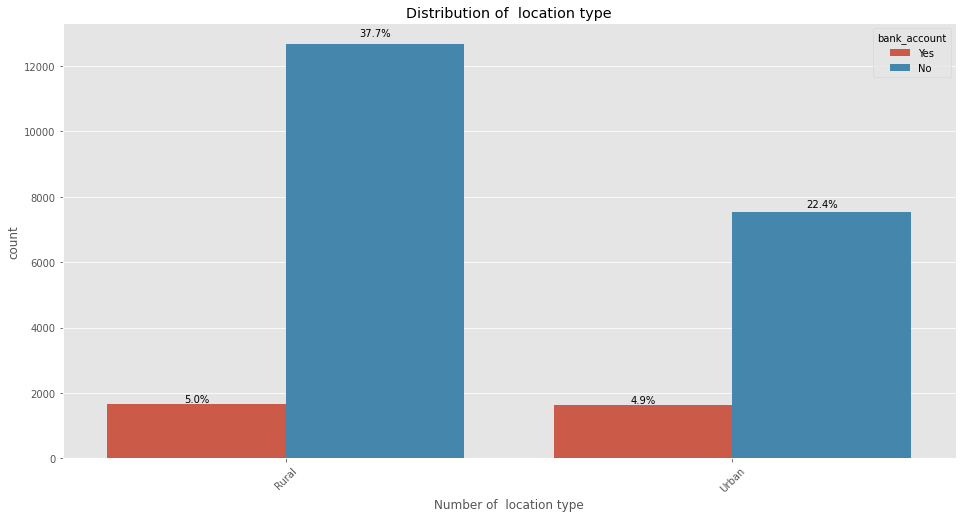

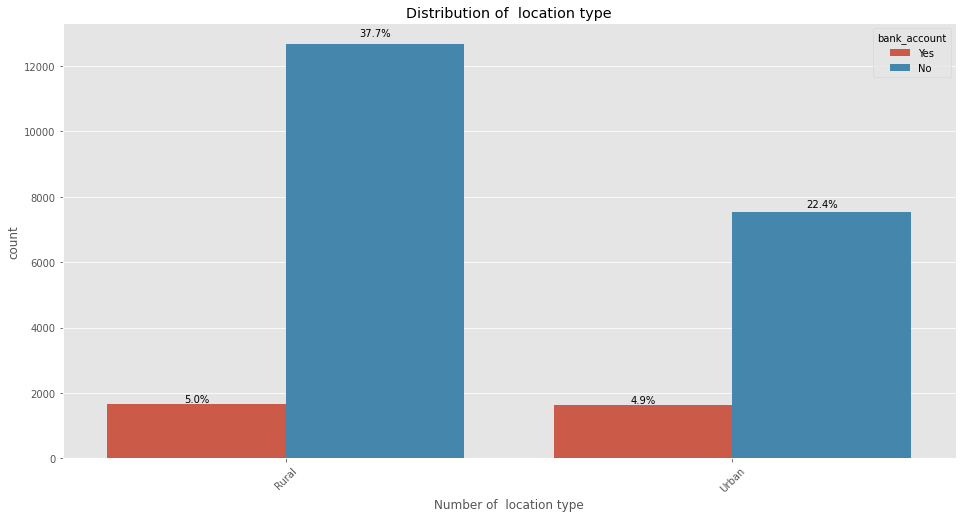

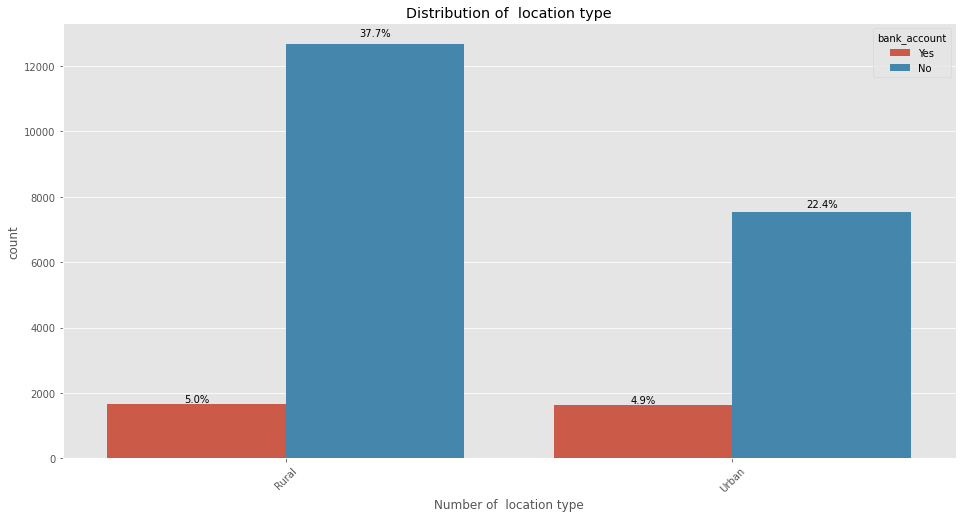

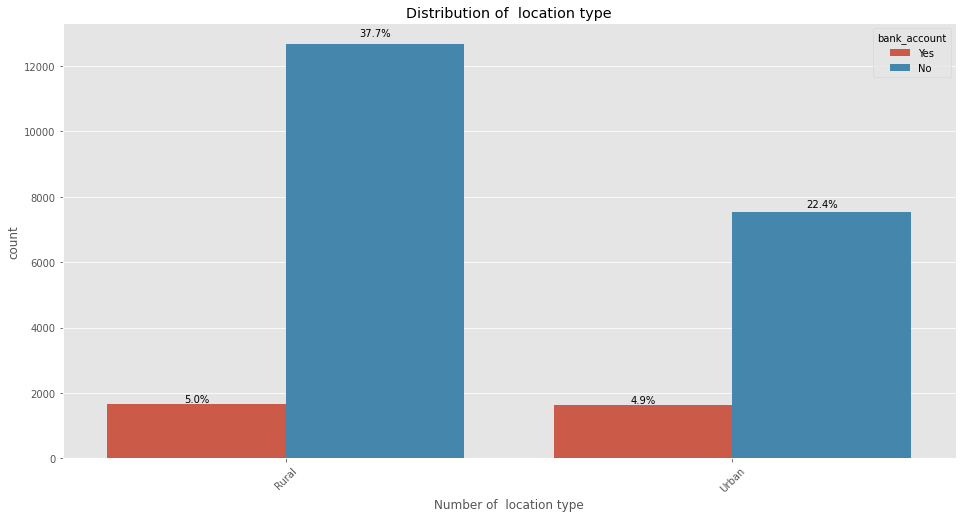

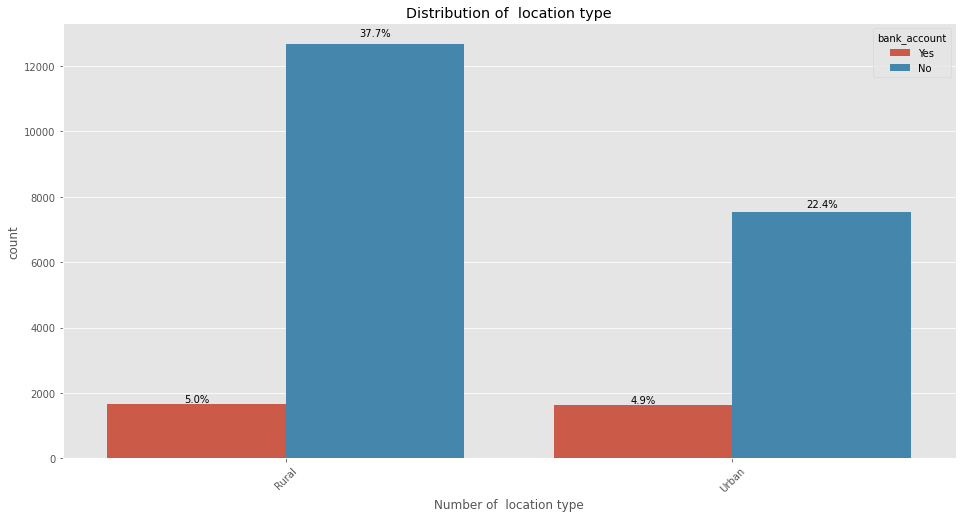

In [ ]:
for column in tqdm(list(cat_df.columns)):
  plotter_multivariate(column)

In [ ]:
from tqdm.notebook import tqdm

for i in tqdm(range(1)):
  print(i)

0



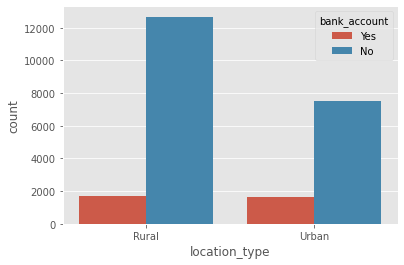

In [ ]:
sns.countplot(x= 'location_type', hue = 'bank_account', data= train)

We have Equal number of people with bank account in both rural and Urban location but we have higehr number of respondent from rural location

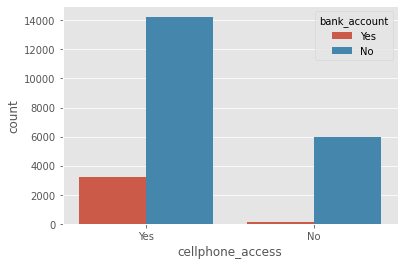

In [ ]:
sns.countplot(x='cellphone_access', hue = 'bank_account' ,data = train)

The people with cell phone are mostly like to have a  bank account unlike the people without cell phone access and we have many no of people with access to cell phone 

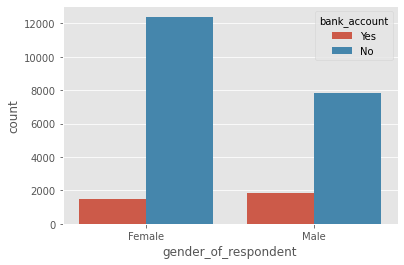

In [ ]:
sns.countplot(x= 'gender_of_respondent', hue = 'bank_account', data= train)

Most of people in our dataset don't have a bank account But most male have a Bank account unlike the Female
and we have more Female respondent in our dataset than male

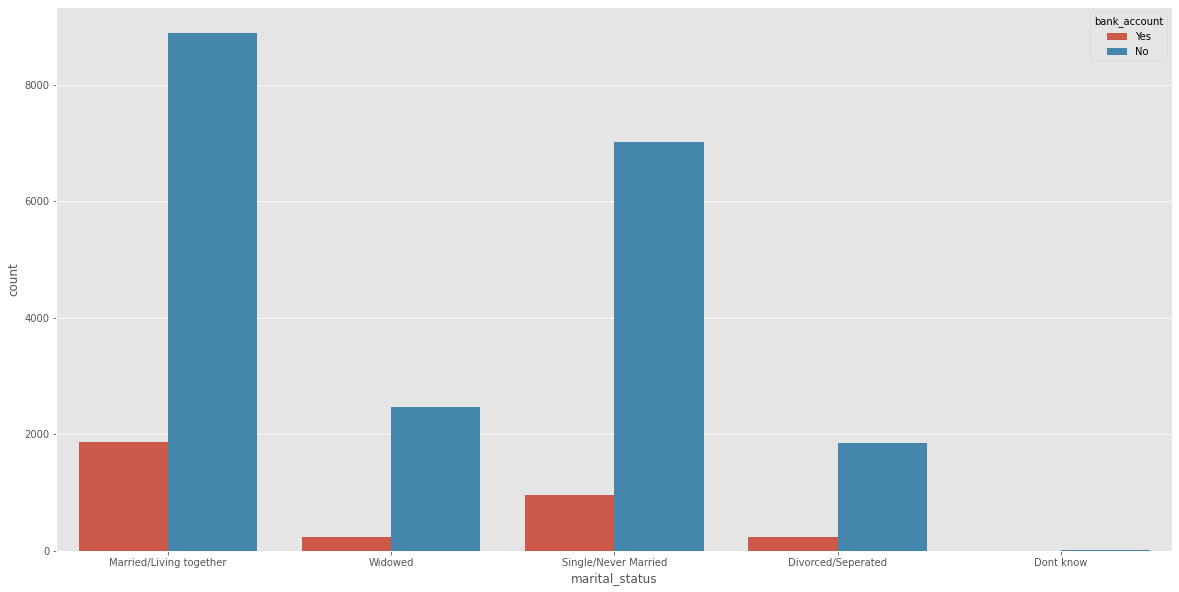

In [ ]:
plt.figure(figsize = (20,10))
sns.countplot(x = 'marital_status',hue= 'bank_account',data = train);

In the column marital_status we have Divorced/Seperated ,Dont Know ,Married/Living together ,single/Never married 
and widowed

 married/Living together have a bank account,than Single/Never Married,then widowed and  Divorced/Seperated have Equal

And we have many married/living together respondent ,then single/Never married ,widowed and few Divorced/Seperated 

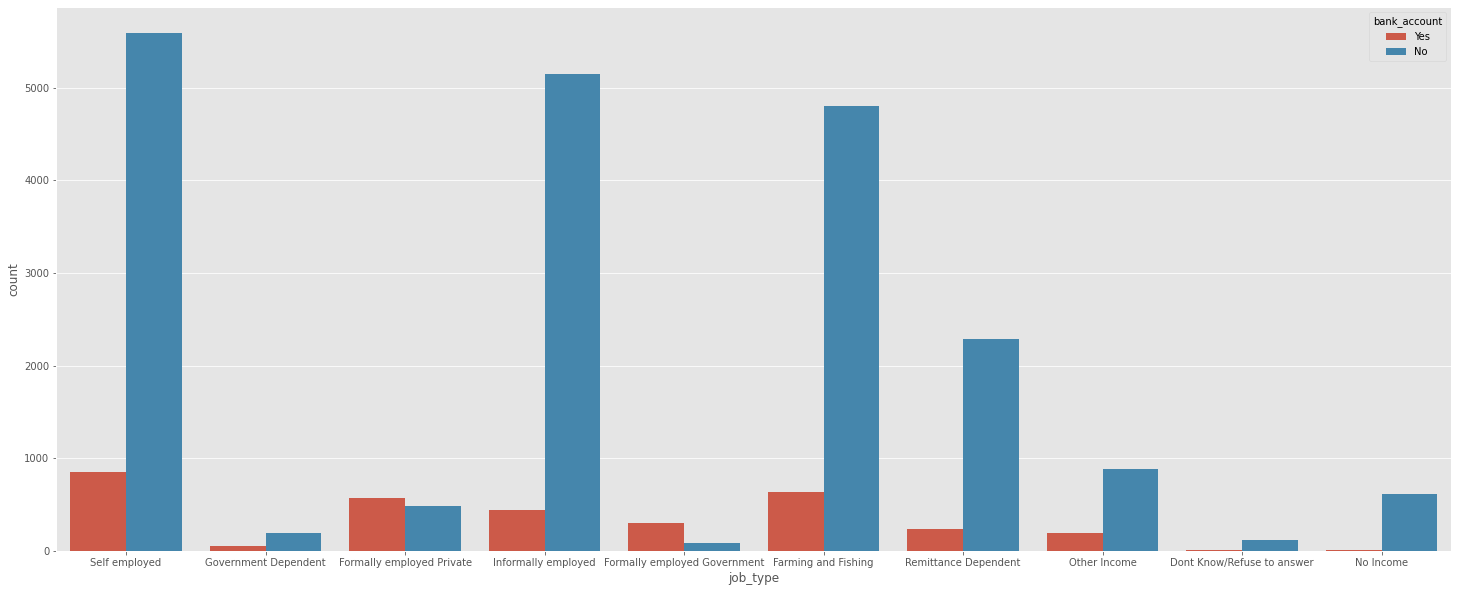

In [ ]:
plt.figure(figsize = (25,10))
sns.countplot(x = 'job_type',hue= 'bank_account',data = train)

<ol> <li>The no of self employed people who have a bank account are less </li>
    <li>The no of Government Dependent people who have a bank account are less</li>
    <li>The no of Formally Employed Private people who have a bank account are more </li>
    <li>The no of Formally Employed Government people who have a bank account are more </li>
    <li>The no of Farming and Fishing people who have a bank account are less</li>
    <li>The no of Remintance Dependent people who have a bank account are less</li>
    <li>The no of Formally Other income people who have a bank account are less</li>
</ol>



In [ ]:
train.head()

country  year  ...                  education_level                   job_type
0   Kenya  2018  ...              Secondary education              Self employed
1   Kenya  2018  ...              No formal education       Government Dependent
2   Kenya  2018  ...  Vocational/Specialised training              Self employed
3   Kenya  2018  ...                Primary education  Formally employed Private
4   Kenya  2018  ...                Primary education        Informally employed

[5 rows x 13 columns]

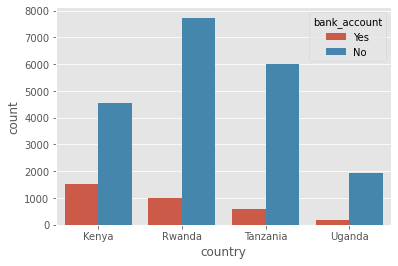

In [ ]:
sns.countplot(x='country',hue = 'bank_account' ,data = train)

Kenya has the highest no of people with bank account and highest respondent are from Rwanda 

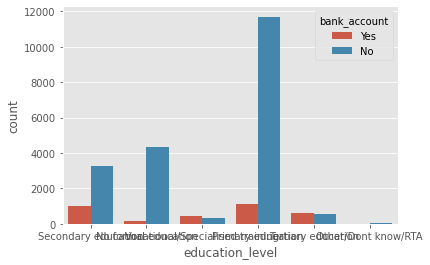

In [ ]:
sns.countplot(x='education_level',hue = 'bank_account' ,data = train)

The No of people we with Secondary Education have a bank Acccount than the rest

The Household Distribution in our dataset so the Highest Population have 3 household

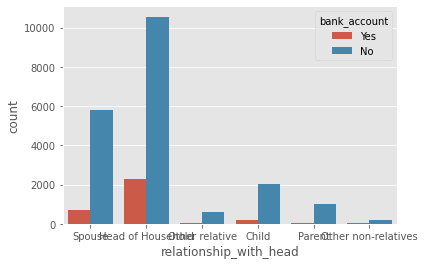

In [ ]:
sns.countplot(x = 'relationship_with_head',hue= 'bank_account',data = train)

people with good relationship with the Head of Household have a bank account1

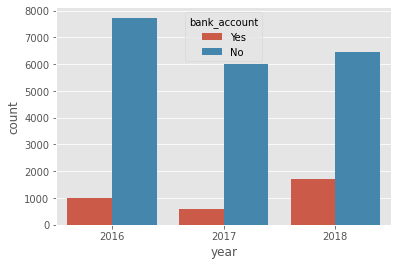

In [ ]:

sns.countplot(x='year',hue = 'bank_account' ,data = train)

0n the year 2018 have highest No of people with bank account

In [ ]:
train1 = combined_data[:len(train)]
test1 = combined_data[len(train):]

In [ ]:
len(train) == len(train1)

True

In [ ]:
len(test) == len(test1)

True

In [ ]:
X_train = train1.drop(columns=['bank_account','year','uniqueid'])
X_test = test1.drop(columns=['bank_account','year','uniqueid'])
y_train = train1.bank_account

## Creating a Validation set

In [ ]:
from sklearn.model_selection import train_test_split

xtrain,xval,ytrain,yval = train_test_split(X_train,y_train,test_size=0.1)

In [ ]:
len(xtrain) == len(ytrain)

True

In [ ]:
from sklearn.ensemble import RandomForestClassifier


#creating a benchmark model

rf = RandomForestClassifier(n_estimators=1000,class_weight='balanced',n_jobs=-1,random_state=56)

rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=False, random_state=56, verbose=0,
                       warm_start=False)

In [ ]:
pd.DataFrame({'features':X_train.columns,'probs':rf.feature_importances_})

features     probs
0                 country  0.071376
1           location_type  0.034122
2        cellphone_access  0.085043
3    gender_of_respondent  0.024554
4  relationship_with_head  0.037520
5          marital_status  0.039026
6         education_level  0.173728
7                job_type  0.101250
8          household_size  0.126357
9       age_of_respondent  0.307023

In [ ]:
preds=rf.predict(X_test)

#submission1

In [ ]:
# create submission DataFrame
# since the xgbmodel has a higher AUC than the randmodel, we will use the 
# xgbmodel to make prediction on the test dataset for submission.


submission_df = pd.DataFrame({"uniqueid": test["uniqueid"] + " x " + test["country"],

"bank_account": preds})
submission_df.to_csv('rf.csv',index=False)

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier()


#creating a xgb  model

xgb = XGBClassifier(objective='binary:logistic',random_state=56,eval_metric='auc',n_estimators=1000,booster='gbtree')

xgb.fit(X_train,y_train)

In [ ]:
pred=xgb.predict(X_test)

# Submission2

In [ ]:
# create submission DataFrame
# since the xgbmodel has a higher AUC than the randmodel, we will use the 
# xgbmodel to make prediction on the test dataset for submission.


submission_df = pd.DataFrame({"uniqueid": test["uniqueid"] + " x " + test["country"],

"bank_account": pred})
submission_df.to_csv('xgb.csv',index=False)

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l2',class_weight='balanced',solver='liblinear',random_state=45,max_iter=5000,n_jobs=-1)

lr.fit(X_train,y_train)

lr_pred=lr.predict(X_test)

# Submission3

In [ ]:
# create submission DataFrame
# since the xgbmodel has a higher AUC than the randmodel, we will use the 
# xgbmodel to make prediction on the test dataset for submission.


submission_df = pd.DataFrame({"uniqueid": test["uniqueid"] + " x " + test["country"],

"bank_account": lr_pred})
submission_df.to_csv('logit.csv',index=False)

In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier(iterations=2,learning_rate=0.8)
cat.fit(X_train,y_train)
cat_pred=cat.predict(X_test)

Submiion 4

In [ ]:

submission_df = pd.DataFrame({"uniqueid": test["uniqueid"] + " x " + test["country"],

"bank_account": cat_pred})
submission_df.to_csv('cat_pred.csv',index=False)

#ligt gbm model

In [ ]:
import lightgbm as lgb
params = {
    'objective' :'regression',
    'learning_rate' : 0.1,
    'num_iterations': 1500,
    'max_bins': 150, 
    'max_depth' :7 ,
    'num_leaves' : 200,
    'feature_fraction': 0.64, 
    'bagging_fraction': 0.8, 
    'bagging_freq':1,
    'boosting_type' : 'gbdt',
    'metric': 'rmse' ,
     'min_data_in_leaf':15,
    'reg_lambda' :150
}


In [ ]:
model = lgb.LGBMRegressor(**params)
model.fit(X_train, y_train, eval_set=[(xval,yval)], verbose=100, early_stopping_rounds=200)
pred = model.predict(X_test)


# Submission 5

In [ ]:
submission_df = pd.DataFrame({"uniqueid": test["uniqueid"] + " x " + test["country"],

"bank_account": pred})
submission_df.to_csv('lgbm_pred.csv',index=False)